# 딥 러닝 학습방법

<br>

<br>


## 행렬곱으로 이해하는 신경망
- 순전파(Forward Propagation) : 인공 신경망에서 입력층에서 출력층 방향으로 연산을 진행하는 과정
  - 주어진 입력이 입력층으로 들어가서 은닉층을 지나 출력층에서 예측값을 얻는 과정


<br>

### 순전파(Foward Propagation) : 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정
- 활성화 함수, 은닉층의 수, 각 은닉층의 뉴런 수 등 딥 러닝 모델을 설계하고나면, 입력값은 입력층, 은닉층을 지나면서 각 층에서의 가중치와 함께 연산되며 출력층으로 향하고, 출력층에서 모든 연산을 마친 예측값이 산출. 

  ![순전파[1].PNG](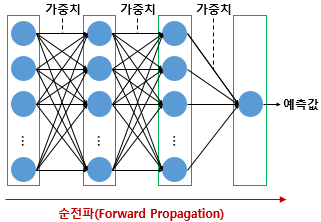)

<br>

### 행렬곱으로 이해하는 순전파
- 입력의 차원이 3, 출력의 차원이 2인 위 인공 신경망

  ![original_nn[1].PNG](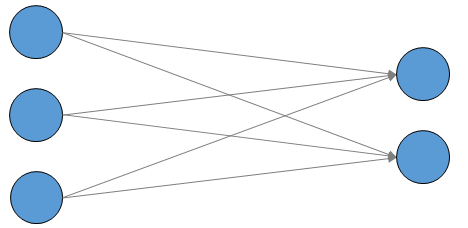)

- 소프트맥스 회귀 (활성화 함수 : 소프트맥스)
  - **로지스틱 회귀가 아닌 소프트맥스 회귀로도 이진 분류는 수행 가능**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))

-  모든 매개변수(가중치 $w$와 편향 $b$)의 수 : 8

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


#### 위 모델은 입력의 차원이 3, 출력의 차원이 2 (입력층의 뉴런이 3개, 출력층의 뉴런이 2개)
- 그림에서 화살표 각각은 가중치 $w$를 의미
* 3개의 뉴런과 2개의 뉴런 사이에는 총 6개의 화살표가 존재하는데, 이는 위 신경망에서 가중치 $w$의 개수가 6개임을 의미
- 이를 행렬곱 관점에서는 3차원 벡터에서 2차원 벡터가 되기 위해서 3 × 2 행렬을 곱한 것 (행렬 각각의 원소가 각각의 $w$)
  <br>

  ![nn[1].PNG](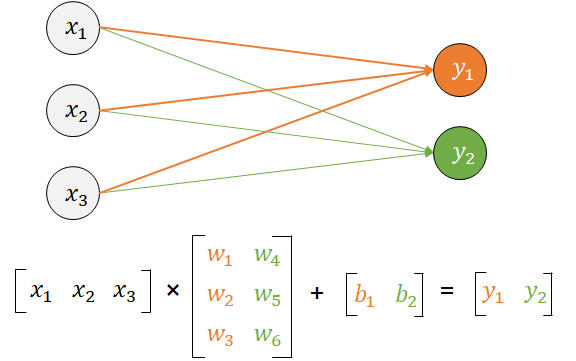)
  


<br>

- 인공 신경망 내부적으로는 편향 $b$의 연산 또한 존재
- 편향 $b_1$, $b_2$의 개수는 항상 출력의 차원을 기준으로 개수를 확인
  - 가중치 $w$의 개수가 $w_1$, $w_2$, $w_3$, $w_4$, $w_5$, $w_6$로 총 6개
  - 편향 $b$의 개수는 $b_1$, $b_2$로 두 개
  - **총 학습가능한 매개변수의 수는 8개**

<br>

$$h_{1} = x_{1}w_{1} + x_{2}w_{2} + x_{3}w_{3} + b_{1}$$

$$h_{2} = x_{1}w_{4} + x_{2}w_{5} + x_{3}w_{6} + b_{2}$$

$$[y_{1}, y_{2}] = softmax([h_{1}, h_{2}])$$


<br>

- $X$ : 입력 $x_1$, $x_2$, $x_3$를 원소로하는 입력 벡터 
- $W$ : $w_1$, $w_2$, $w_3$, $w_4$, $w_5$, $w_6$
를 원소로 하는 3 × 2 가중치 행렬
- $B$ : 편향 $b_1$, $b_2$를 원소로 하는 벡터 
- $Y$ : $y_1$, $y_2$를 원소로하는 출력 벡터 

  ![matrix_multiplication[1].PNG](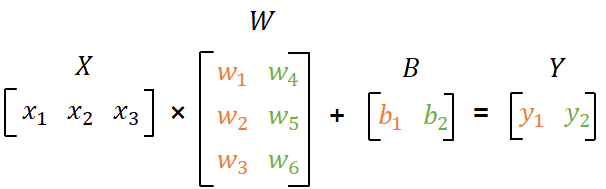)



$$Y = XW + B$$

<br>

<br>

### 행렬곱으로 이해하는 병렬 연산 
![parallel_nn[1].PNG](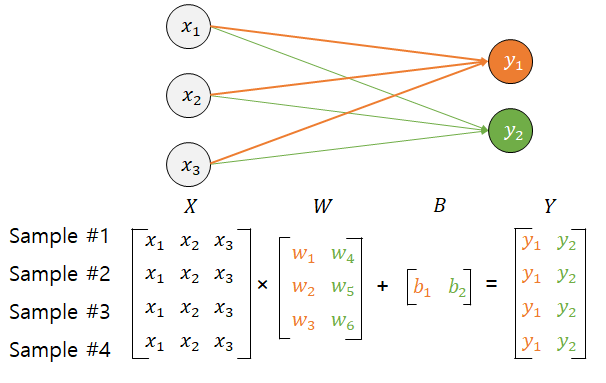)

<br>

<br>

### 행렬곱으로 이해하는 다층 퍼셉트론의 순전파

![neuralnetwork_final[1].PNG](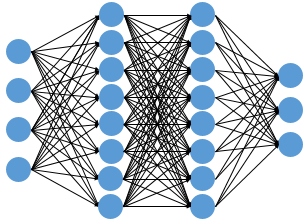)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))

<br> 

#### 행렬의 크기 추정
1. **입력층** : 4개의 입력과 8개의 출력

<br>

* **입력층 $→$ 은닉층1**
  * 입력 행렬, 가중치 행렬, 편향 행렬, 출력 행렬은 다음과 같은 크기 관계

  $$X_{m\ \text{×}\ n} × W_{n\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{m\ \text{×}\ j}$$

  * layer 1의 입력 행렬 $X$ 의 크기는 1 × 4
  - layer 1의 출력은 8개이므로, 그에 따라 출력 행렬 $Y$
의 크기는 1 × 8

  $$X_{1\ \text{×}\ 4} × W_{n\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{1\ \text{×}\ 8}$$

  * 가중치 행렬 $W$의 행은 입력 행렬 $X$의 열과 같아야 함

  $$X_{1\ \text{×}\ 4} × W_{4\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{1\ \text{×}\ 8}$$

  * 편향 행렬 $B$는 출력 행렬 $Y$의 크기에 영향을 주지 않으므로 편향 행렬 $B$의 크기는 출력 행렬 $Y$의 크기와 같음

  $$X_{1\ \text{×}\ 4} × W_{4\ \text{×}\ j} + B_{1\ \text{×}\ 8} = Y_{1\ \text{×}\ 8}$$

  * 가중치 행렬 $W$의 열은 출력 행렬 $Y$의 열과 동일

  $$X_{1\ \text{×}\ 4} × W_{4\ \text{×}\ 8} + B_{1\ \text{×}\ 8} = Y_{1\ \text{×}\ 8}$$

<br> 

2. **은닉층1** : 8개의 입력과 8개의 출력

<br> 

* **은닉층1 $→$ 은닉층2**
  * 입력층 $→$ 은닉층1에서의 출력 행렬 $Y$를 은닉층2에서의 입력 행렬 $X$로 다시 정의

  $$은닉층1\;⇒\;은닉층2\;:\;X_{1\ \text{×}\ 8} × W_{8\ \text{×}\ 8} + B_{1\ \text{×}\ 8} = Y_{1\ \text{×}\ 8}$$

<br>

3. **은닉층2** : 8개의 입력과 3개의 출력


<br>

* **은닉층2 $→$ 출력층**
  * 은닉층1 $→$ 은닉층2에서의 출력 행렬 $Y$를 출력층에서의 입력 행렬 $X$로 다시 정의
  * 은닉층과 출력층에 활성화 함수 relu와 softmax가 존재하지만 활성화 함수는 행렬의 크기에 영향을 주지 않음

  $$은닉층2\;⇒\;출력층\;:X_{1\ \text{×}\ 8} × W_{8\ \text{×}\ 3} + B_{1\ \text{×}\ 3} = Y_{1\ \text{×}\ 3}$$

<br>


4. **출력층** : 3개의 입력과 3개의 출력

<br>

<br>

#### 순전파를 진행하고 예측값을 구한 이후, 예측값과 실제값으로부터 오차를 계산하고, 오차로부터 가중치와 편향을 업데이트 

<br>

#### 인공 신경망은 순전파와는 반대 방향으로 연산을 진행하며 가중치를 업데이트하는데, 이 과정을 역전파(BackPropagation)

<br>

<br>

## 딥 러닝의 학습 방법

<br>

### 손실 함수(Loss function)
- 손실 함수는 실제값과 예측값의 차이를 수치화해주는 함수
  - 오차가 클 수록 손실함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 감소. 
  - 회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용
- **손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 $w$와 편향 $b$의 값을 찾는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요**

<br> 

#### 1) MSE(Mean Squared Error, MSE)
- 연속형 변수를 예측할 때 사용


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

<br>

#### 2) 이진 크로스 엔트로피(Binary Cross-Entropy)
- 이항 교차 엔트로피라고도 부르는 손실 함수입니다. 출력층에서 시그모이드 함수를 사용하는 이진 분류 (Binary Classification)의 경우

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

<br>

#### 3) 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)

- 출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류(Multi-Class Classification)일 경우 categorical_crossentropy를 사용

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# del.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

- 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행시

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

<br>

#### 4) 그 외의 손실 함수
- https://www.tensorflow.org/api_docs/python/tf/keras/losses

<br>

<br>

### 배치 크기(Batch Size)에 따른 경사 하강법
- **배치(Batch) : 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터**
  - 전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정 가능

  ![역전파_과정[1].PNG](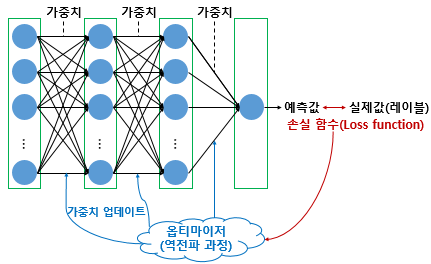)

<br>

- 손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 상이

<br>

#### 배치 경사 하강법(Batch Gradient Descent)
- 가장 기본적인 경사 하강법 
- **오차(loss)를 구할 때 전체 데이터를 고려**
  - **배치 경사 하강법은 한 번의 에포크(전체 데이터에 대한 한 번의 훈련 횟수를)에 모든 매개변수 업데이트를 단 한 번 수행**
  - 배치 경사 하강법은 전체 데이터를 고려해서 학습하므로 한 번의 매개 변수 업데이트에 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점

<br>

#### 2) 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

- 기존의 배치 경사 하강법은 전체 데이터에 대해서 계산을 하다보니 시간이 오래걸린다는 단점
- **배치 크기가 1인 확률적 경사 하강법은 매개변수 값 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산**
  - 더 적은 데이터를 사용하므로 더 빠르게 계산 가능

  ![경사하강법SGD[1].PNG](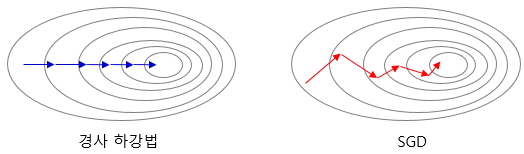)

- 확률적 경사 하강법은 매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있지만 **하나의 데이터에 대해서만 메모리에 저장하면 되므로 자원이 적은 컴퓨터에서도 쉽게 사용가능**

<br>

#### 3) 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
- 전체 데이터도, 1개의 데이터도 아닌, **배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정하는 경사 하강법**
- 미니 배치 경사 하강법은 **전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적**

  - **배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적**
  - 기본값은 32 ($=2^5$)

<br>

<br>

### 옵티마이저(Optimizer)

<br>

#### 1) 모멘텀(Momentum)
- 관성이라는 물리학의 법칙을 응용한 방법
- **모멘텀은 경사 하강법에서 계산된 접선의 기울기에, 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영**
  - **마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과**

  ![로컬미니멈[1].PNG](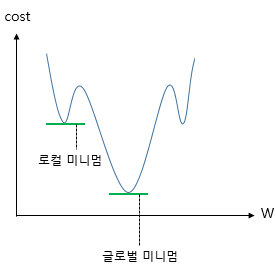)


- 로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황에서, **모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 현재의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과**
  - **글로벌 미니멈(Global Minimum)** : 전체 함수에 걸친 최소값
  - **로컬 미니멈(Local Minimum)** : 글로벌 미니멈이 아닌 특정 구역에서의 최소값

<br>

#### 2) 아다그라드(Adagrad)
- 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적 $→$ **아다그라드는 각 매개변수에 서로 다른 학습률을 적용**
  - **변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정**

<br>

#### 3) 알엠에스프롭(RMSprop)
- **아다그라드는 학습을 계속 진행한 경우에는, 학습률이 지나치게 떨어진다는 단점 존재** $→$ **이를 보완한 RMSprop**

<br>

<br>

### 5. 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)
- 기계는 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트 (머신러닝에서의 학습)
```
사람마다 동일한 문제지와 정답지를 주더라도 공부 방법은 사실 천차만별입니다. 
어떤 사람은 문제지 하나를 다 풀고 나서 정답을 채점하는데 어떤 사람은 문제지의 문제를 10개 단위로 끊어서 공부합니다.
문제 10개를 풀고 채점하고 다시 다음 문제 10개를 풀고 채점하고 반복하는 방식으로 학습하는 방식입니다. 
또한 게으른 사람은 문제지를 세 번 공부하는데, 성실한 사람은 문제지의 문제를 달달 외울만큼 문제지를 100번 공부합니다.
```

  ![batchandepochiteration[1].PNG](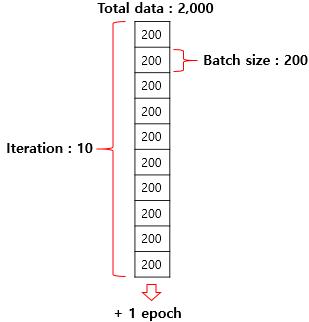)

<br>

#### 1) 에포크(Epoch) : 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태

```
전체 데이터를 하나의 문제지에 비유한다면 문제지의 모든 문제를 끝까지 다 풀고, 
정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태를 말합니다.
```

- **만약 에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습**
  - 문제지를 50번 푼 셈입니다. 
- **에포크 횟수가 지나치거나 너무 적으면 과적합과 과소적합 발생**

<br>

#### 2) 배치 크기(Batch size) : 매개변수를 업데이트하는 데이터의 단위
```
현실에 비유하면 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐의 문제입니다. 
사람은 문제를 풀고 정답을 보는 순간 부족했던 점을 깨달으며 지식이 업데이트 된다고 하였습니다. 
기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트합니다. 
여기서 중요한 포인트는 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점이라는 겁니다.
```
- **배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트**

```
사람이 2,000 문제가 수록되어있는 문제지의 문제를 **200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200**
```

- **배치 크기와 배치의 수는 다른 개념**
  - **전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10**
- 이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10) 
- **이때 배치의 수를 이터레이션**

<br>

<br>

#### 3) 이터레이션(Iteration) 또는 스텝(Step) 
- **이터레이션** : **한 번의 에포크를 끝내기 위해서 필요한 배치의 수 (또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수)**
  - 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10 $→$ 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미
  - 배치 크기가 1인 확률적 경사 하강법 : 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행